# Visual Inspection of Motorcycle Connecting Rods.

author:
- Samuele Marino

## Introduction

Given a series of different images, for each image the program is able to identify all the information required for the scope of the project. To achieve the goal, we used computer vision techniques to separate the joined rods, eliminate noise from the images and ignore objects that should not be analyzed. The programme is able to identify the following information for each image:
- Type of rod
- Position and orientation
- Length, Width, Width at the barycentre
- For each hole, position of the centre and diameter size.

## Import libraries And Preparation images


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt, atan2, cos, sin, pi, tan, degrees
import math
import os
from copy import copy

Preparation of the folder's path and the ids of the images for each task:

In [4]:
folder_path = './img/'

task_one = ['TESI00.BMP', 'TESI01.BMP', 'TESI12.BMP', 'TESI21.BMP', 'TESI31.BMP', 'TESI33.BMP']
task_two1 = ['TESI44.BMP', 'TESI47.BMP', 'TESI48.BMP', 'TESI49.BMP']
task_two2 = ['TESI50.BMP', 'TESI51.BMP']
task_two3 = ['TESI90.BMP', 'TESI92.BMP', 'TESI98.BMP']

Creation of a routine to load all images on a dict:

In [5]:
def load_images_from_folder(folder):
    images = {}

    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)

        if img is not None:  # Sanity check
            images[filename] = img

    return images


In [6]:
imgs_dict = load_images_from_folder(folder_path)

## First Task

The Images contain only connecting rods, which can be of both types and feature significantly diverse dimensions.

Connecting rods have been carefully placed within the inspection area so to appear well separated in images
Images have been taken by the backlighting technique so to render rods easily distinguishable from background.

However, for flexibility reasons the system should not
require any change to work properly with lighting sources of different power.

This task work with these images:
Tesi00.bmp, Tesi01.bmp, Tesi12.bmp, Tesi21.bmp, Tesi31.bmp, Tesi33.bmp.

### Visualization of the images of the first task:

In [7]:
def img_show(dict, task):
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(25, 10))

    for ax, key in zip(axs.flat, task):
        ax.imshow(dict[key], cmap='gray')
        ax.set_title(str(key))

    plt.tight_layout()
    plt.show()

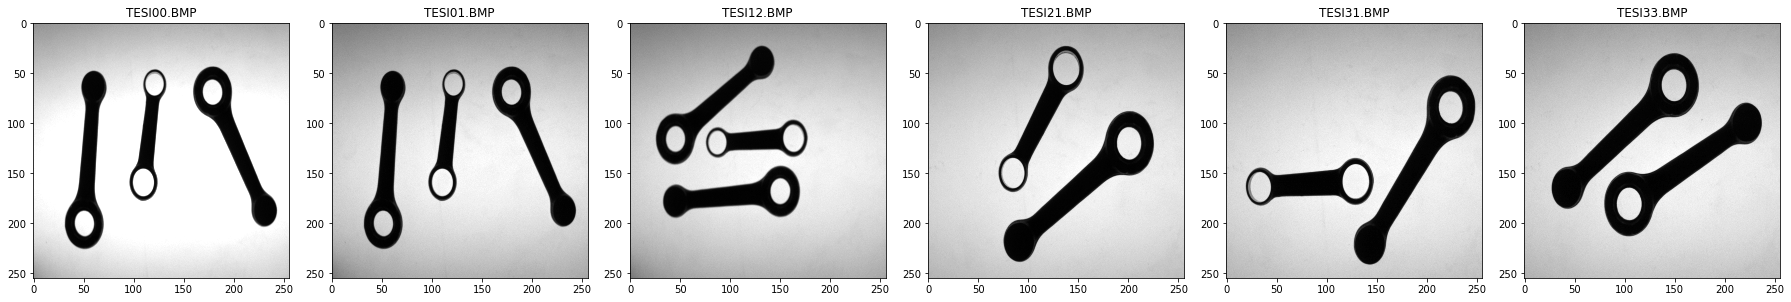

In [9]:
img_show(imgs_dict, task_one)

### Image segmentation


The segmentation is done to distinguish the information part related to the rods even though the images were taken with the backlight technique
and the rods are easily distinguishable from the background. Binarization techniques allow to separate the object from the background and then analyse only the pixels of the object. Considering the various techniques with which segmentation can be performed, we decided to use the Otsu algorithm already implemented in the OpenCv library.
We use this algorithm because it automatically determines the threshold value. Otzu is advantageous because it allows a different threshold for each image and adapts the
threshold more easily to variations in illumination.

Perform the binarization of the image through the Otsu algorithm:

In [10]:
seg_dict = copy(imgs_dict)

for key in task_one:
    seg_dict[key] = cv2.threshold(seg_dict[key], 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

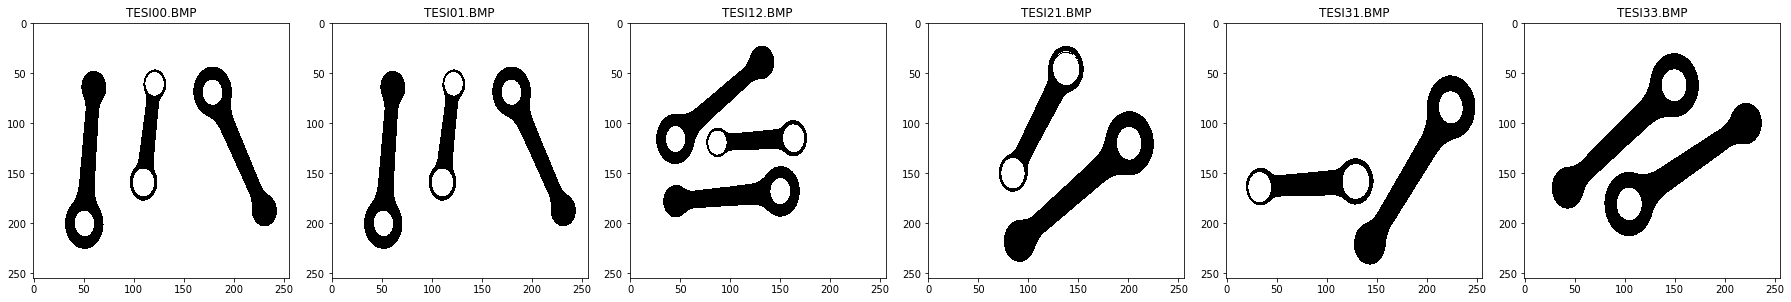

In [11]:
img_show(seg_dict, task_one)

Invert black and white in order to let the function findContours find the proper contours:

In [12]:
for key in task_one:
    seg_dict[key] = 255 - seg_dict[key]

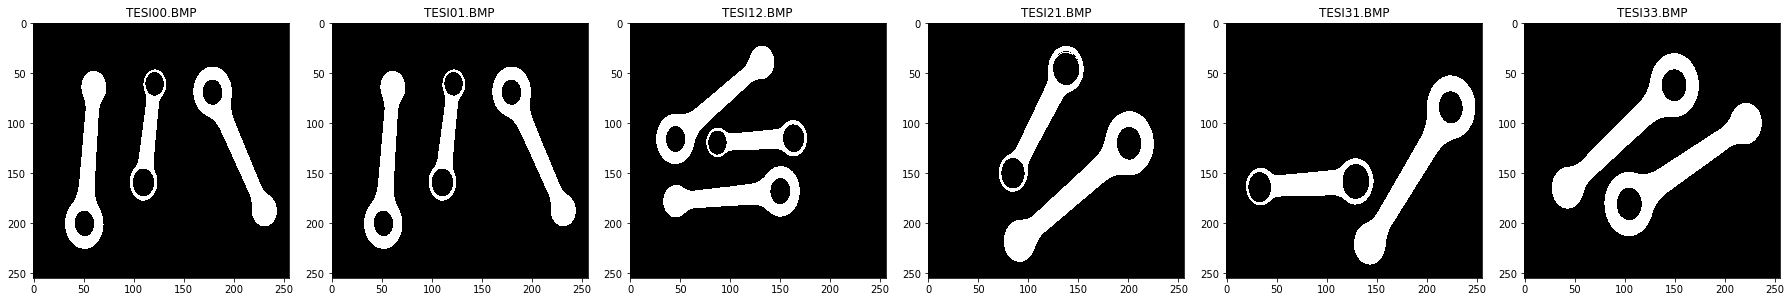

In [13]:
img_show(seg_dict, task_one)

### Extraction of connective rods

In order to complete the extraction of the objects and isolate the connecting rods I use the connectedComponentsWithStats() function. Connecting rods are classified
according to the number of holes they have and we decided to use the findContours() function available in the OpenCV library. This function extracts the contours of the
objects in the image and hierarchize them into a tree. In the tree generated by the function, each node corresponds to a contour identified in the image. If in the image a contour K is immediately contained in a contour L, then in the tree node K is a child of node L. In this way, after identifying the contour of a connecting rod, it is sufficient to recognize in the corresponding hierarchy how many children it has: 1 child only means it has only 1 hole and the rod is type A, 2 children means it has 2 holes and the rod is type B.

In [14]:
a, b, c, d = cv2.connectedComponentsWithStats(seg_dict['TESI00.BMP'], connectivity=4)


: 

: 

In [ ]:
extr_dict = {}

for key in task_one:
    extr_dict[key] = cv2.connectedComponentsWithStats(seg_dict[key], connectivity = 4)


: 

: 